<a href="https://colab.research.google.com/github/bu11ymaguire/studying/blob/main/ReinforcementLearning/Iterative_Policy_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ReinforcementLearning/

#반복적 정책 평가 _ Grid World

In [1]:
V = {'L1':0.0, 'L2':0.0}
new_V = V.copy()

## 무지성 반복

In [2]:
for _ in range(100):
  new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
  new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
  V = new_V.copy()
  print(f"iter:{_}: L1:{V['L1']}, L2:{V['L2']}")

iter:0: L1:0.0, L2:-0.5
iter:1: L1:-0.22499999999999998, L2:-0.725
iter:2: L1:-0.42749999999999994, L2:-0.9274999999999999
iter:3: L1:-0.6097499999999999, L2:-1.10975
iter:4: L1:-0.7737750000000001, L2:-1.273775
iter:5: L1:-0.9213975000000002, L2:-1.4213975
iter:6: L1:-1.05425775, L2:-1.55425775
iter:7: L1:-1.1738319750000001, L2:-1.6738319750000001
iter:8: L1:-1.2814487775, L2:-1.7814487775
iter:9: L1:-1.3783038997500001, L2:-1.8783038997500001
iter:10: L1:-1.4654735097750002, L2:-1.965473509775
iter:11: L1:-1.5439261587975002, L2:-2.0439261587975004
iter:12: L1:-1.61453354291775, L2:-2.11453354291775
iter:13: L1:-1.6780801886259753, L2:-2.1780801886259753
iter:14: L1:-1.735272169763378, L2:-2.2352721697633777
iter:15: L1:-1.7867449527870403, L2:-2.28674495278704
iter:16: L1:-1.833070457508336, L2:-2.3330704575083363
iter:17: L1:-1.8747634117575025, L2:-2.3747634117575025
iter:18: L1:-1.9122870705817523, L2:-2.412287070581752
iter:19: L1:-1.9460583635235769, L2:-2.446058363523577
iter


## 임계점($\Delta < \theta$)에서 멈추기

In [3]:
V = {'L1':0.0, 'L2':0.0}
new_V = V.copy()

cnt = 0

while (True):
  new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
  new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])

  delta = abs(new_V['L1']- V['L1'])
  delata = max(delta, abs(new_V['L2'] - V['L2']))

  V = new_V.copy()

  cnt += 1

  if delata < 0.0001:
    print(V)
    print(f"갱신횟수:{cnt}")
    break

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
갱신횟수:76


## 기존의 new_v 대신 덮어쓰기 방식

In [4]:
V = {'L1':0.0, 'L2':0.0}

cnt = 0

while(True):
  t = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
  delta = abs(t - V['L1'])
  V['L1'] = t

  t = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
  delta = max(delta, abs(t - V['L2']))
  V['L2'] = t

  cnt += 1

  if delta < 0.0001:
    print(V)
    print(f"갱신횟수:{cnt}")
    break

{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
갱신횟수:60


### 왜 new_v랑 덮어쓰기의 결과가 다를까?
| 구분 | 동기적 업데이트 (Synchronous) | 비동기적 업데이트 (In-place) |
| --- | --- | --- |
| **참조 값** | **이전 반복()**의 가치 함수값만 참조 | **현재 반복()**에서 이미 계산된 값 포함 |
| **업데이트 시점** | 모든 상태의 계산이 끝난 후 일괄 갱신 | 각 상태의 계산이 끝나는 즉시 즉시 갱신 |
| **정보 전파 속도** | 상대적으로 느림 | **빠름** (최신 정보가 즉각 반영됨) |
| **수렴 속도** | 더 많은 반복 횟수 필요 | **더 적은 반복 횟수**로 수렴 가능 |
| **메모리 효율** | 이전 값 보관을 위해 별도 배열 필요 | 하나의 배열만으로 구현 가능 (효율적) |

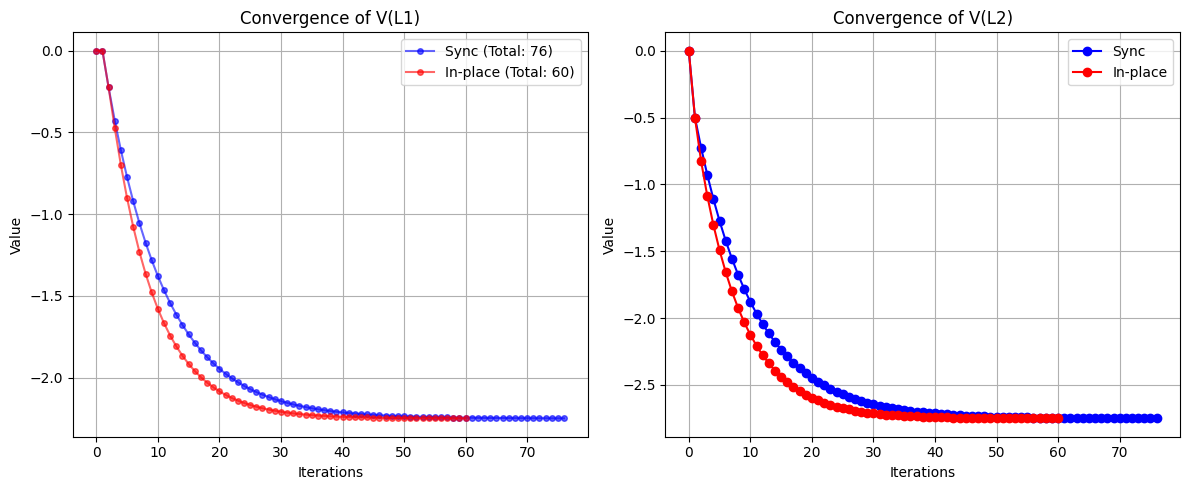

In [6]:
import matplotlib.pyplot as plt

def run_sync_update(theta=0.0001):
    V = {'L1': 0.0, 'L2': 0.0}
    history = [(V['L1'], V['L2'])]
    cnt = 0
    while True:
        new_V = V.copy()
        new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
        new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])

        delta = max(abs(new_V['L1'] - V['L1']), abs(new_V['L2'] - V['L2']))
        V = new_V.copy()
        history.append((V['L1'], V['L2']))
        cnt += 1
        if delta < theta:
            break
    return history, cnt

def run_inplace_update(theta=0.0001):
    V = {'L1': 0.0, 'L2': 0.0}
    history = [(V['L1'], V['L2'])]
    cnt = 0
    while True:

        t1 = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
        delta1 = abs(t1 - V['L1'])
        V['L1'] = t1

        t2 = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
        delta2 = abs(t2 - V['L2'])
        V['L2'] = t2

        delta = max(delta1, delta2)
        history.append((V['L1'], V['L2']))
        cnt += 1
        if delta < theta:
            break
    return history, cnt

sync_hist, sync_cnt = run_sync_update()
inplace_hist, inplace_cnt = run_inplace_update()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot([h[0] for h in sync_hist], 'bo-', label=f'Sync (Total: {sync_cnt})', markersize=4, alpha=0.6)
plt.plot([h[0] for h in inplace_hist], 'ro-', label=f'In-place (Total: {inplace_cnt})', markersize=4, alpha=0.6)
plt.title('Convergence of V(L1)')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot([h[1] for h in sync_hist], 'bo-', label='Sync')
plt.plot([h[1] for h in inplace_hist], 'ro-', label='In-place')
plt.title('Convergence of V(L2)')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()